## Observations and Insights 

In [118]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_df = pd.DataFrame(mouse_metadata)
study_results_df = pd.DataFrame(study_results)

#Remove Duplicates
before_clean_df = study_results_df
after_clean_df = before_clean_df

after_clean_df['Mouse ID'] = after_clean_df['Mouse ID'].astype(str)
after_clean_df['Timepoint'] = after_clean_df['Timepoint'].astype(str)

after_clean_df["Uniques"] = after_clean_df['Mouse ID'] + " " + after_clean_df['Timepoint']

after_clean_df = after_clean_df.drop_duplicates(subset=['Uniques'])

#Check they were removed
before_count = before_clean_df.count()
print(before_count)

after_count = after_clean_df.count()
print(after_count)

#Drop the Uniques key
after_clean_df = after_clean_df.drop(columns=['Uniques'])
after_clean_df

#Clean up name
mouse_clean_df = after_clean_df

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
Uniques               1893
dtype: int64
Mouse ID              1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
Uniques               1888
dtype: int64


In [119]:
# Combine the data into a single dataset

merge_df = pd.merge(mouse_clean_df, mouse_df, on = "Mouse ID", how="outer")
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1883,m601,25,33.118756,1,Capomulin,Male,22,17
1884,m601,30,31.758275,1,Capomulin,Male,22,17
1885,m601,35,30.834357,1,Capomulin,Male,22,17
1886,m601,40,31.378045,1,Capomulin,Male,22,17


In [120]:
# Display the data table for preview
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1883,m601,25,33.118756,1,Capomulin,Male,22,17
1884,m601,30,31.758275,1,Capomulin,Male,22,17
1885,m601,35,30.834357,1,Capomulin,Male,22,17
1886,m601,40,31.378045,1,Capomulin,Male,22,17


In [121]:
# Checking the number of mice.
number_of_mice = merge_df['Mouse ID'].nunique()
number_of_mice
#df['hID'].nunique()
#Dataframe.nunique (axis=0/1, dropna=True/False)

249

In [122]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

##Done out of Order

In [123]:
# Optional: Get all the data for the duplicate mouse ID. 

##Done out of Order

In [124]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

##Done out of Order

In [125]:
# Checking the number of mice in the clean DataFrame.

##Done out of Order
merge_df
merge_df = merge_df.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume'})
merge_df.head()



,Mouse ID,Timepoint,Tumor Volume,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


## Summary Statistics

In [126]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drug_regimen_uniques = merge_df['Drug Regimen'].unique()
drug_regimen_uniques

for drug in drug_regimen_uniques:
    dru_df = merge_df.loc[merge_df["Drug Regimen"] == drug, :]
    print("Please see below for summary stats for " + drug)
    print(dru_df[['Tumor Volume']].describe())



Please see below for summary stats for Capomulin
       Tumor Volume
count    230.000000
mean      40.675741
std        4.994774
min       23.343598
25%       37.685933
50%       41.557809
75%       45.000000
max       48.158209
Please see below for summary stats for Ketapril
       Tumor Volume
count    188.000000
mean      55.235638
std        8.279709
min       45.000000
25%       48.232987
50%       53.698743
75%       60.870951
max       78.567014
Please see below for summary stats for Naftisol
       Tumor Volume
count    186.000000
mean      54.331565
std        8.134708
min       45.000000
25%       47.285874
50%       52.509285
75%       59.963034
max       76.668817
Please see below for summary stats for Infubinol
       Tumor Volume
count    178.000000
mean      52.884795
std        6.567243
min       36.321346
25%       47.312353
50%       51.820584
75%       57.314444
max       72.226731
Please see below for summary stats for Stelasyn
       Tumor Volume
count    181.00000

In [127]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_by_drug_df = merge_df.groupby('Drug Regimen')['Tumor Volume'].agg(['mean','median','var','std','sem'])

summary_by_drug_df = summary_by_drug_df.rename(columns={'var': 'variance', 'std': 'standard deviation', 'sem': 'standard error of mean'})
summary_by_drug_df

,mean,median,variance,standard deviation,standard error of mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [128]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_by_drug_df = summary_by_drug_df.rename(columns={'var': 'variance', 'std': 'standard deviation', 'sem': 'standard error of mean'})
summary_by_drug_df

,mean,median,variance,standard deviation,standard error of mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

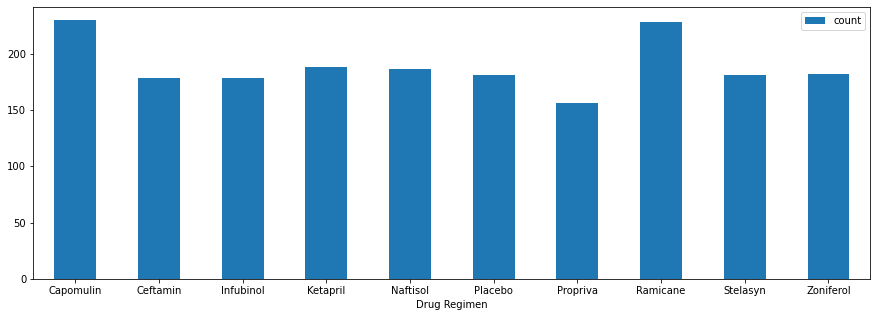

In [129]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

number_measurements_each_drug_df = merge_df.groupby('Drug Regimen')['Tumor Volume'].agg(['count'])
number_measurements_each_drug_df

measurement_count_by_drug_graph = number_measurements_each_drug_df.plot.bar(rot=0,figsize=(15,5))
measurement_count_by_drug_graph


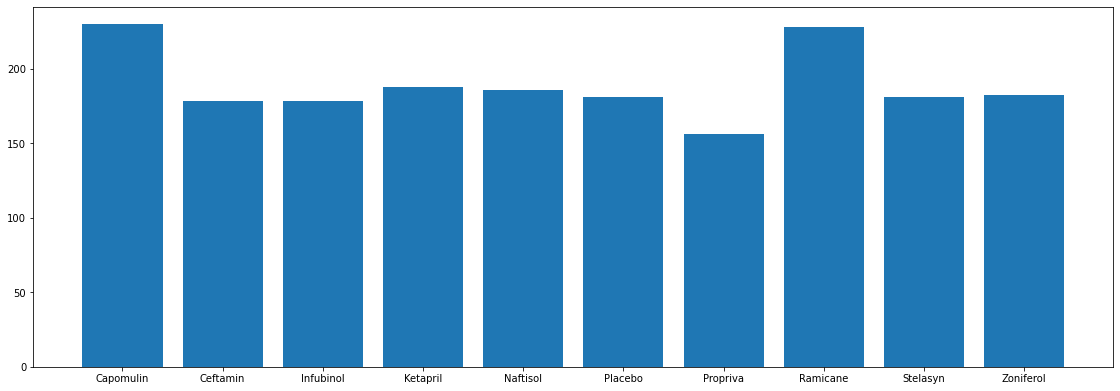

In [130]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

measurement_count = number_measurements_each_drug_df['count']
sorted_drug_list = sorted(drug_regimen_uniques)

fig = plt.figure(figsize =(15,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(sorted_drug_list,measurement_count)
plt.show()

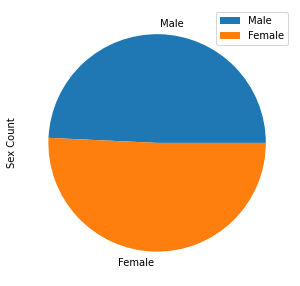

In [131]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

number_measurements_by_sex_df = merge_df.groupby('Sex')['Tumor Volume'].agg(['count']).unstack(fill_value=0)
sex_count = number_measurements_by_sex_df['count']
sexes_list = ["Male", "Female"]
sexes_count = [930, 958]
sexes_pie_df = pd.DataFrame(
     {'Sex': sexes_list,
     'Sex Count': sexes_count
      })
sexes_pie_df

plot = sexes_pie_df.plot.pie(y='Sex Count', figsize=(5, 5), labels=sexes_list)


#plot = plot.pie(y='930,958', figsize=(5, 5))



#merge_df

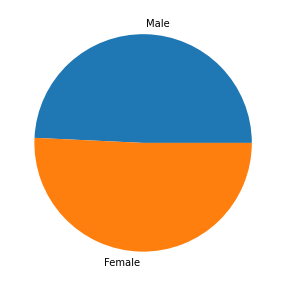

In [132]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

fig = plt.figure(figsize =(5, 5)) 
plt.pie(sexes_count, labels = sexes_list) 
plt.show()




In [133]:
merge_df['Timepoint'] = merge_df['Timepoint'].astype(float)
merge_df


,Mouse ID,Timepoint,Tumor Volume,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0.0,45.000000,0,Capomulin,Female,9,22
1,b128,5.0,45.651331,0,Capomulin,Female,9,22
2,b128,10.0,43.270852,0,Capomulin,Female,9,22
3,b128,15.0,43.784893,0,Capomulin,Female,9,22
4,b128,20.0,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1883,m601,25.0,33.118756,1,Capomulin,Male,22,17
1884,m601,30.0,31.758275,1,Capomulin,Male,22,17
1885,m601,35.0,30.834357,1,Capomulin,Male,22,17
1886,m601,40.0,31.378045,1,Capomulin,Male,22,17


## Quartiles, Outliers and Boxplots

In [134]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

greatest_timepoint_df = merge_df.groupby(["Mouse ID"])['Timepoint'].max()
greatest_timepoint_df = pd.DataFrame(greatest_timepoint_df)
greatest_timepoint_df.rename(columns={"Timepoint": "Greatest Timepoint"})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

new_merge_df = pd.merge(merge_df, greatest_timepoint_df, on="Mouse ID", how="right")
new_merge_df = new_merge_df.rename(columns={"Timepoint_y": "Greatest Timepoint","Timepoint_x": "Timepoint" })
new_merge_df["Max Test"] = new_merge_df["Timepoint"] == new_merge_df["Greatest Timepoint"]  
new_merge_df

max_tumor_volume_df = new_merge_df.loc[new_merge_df['Max Test']]
max_tumor_volume_df
max_tumor_volume_df = max_tumor_volume_df[["Mouse ID", "Tumor Volume", 'Drug Regimen']]
max_tumor_volume_df

# Capomulin_df = new_merge_df.loc[new_merge_df['Drug Regimen'] == 'Capomulin']
# Ramicane_df = new_merge_df.loc[new_merge_df['Drug Regimen'] == 'Ramicane']
# Infubinol_df = new_merge_df.loc[new_merge_df['Drug Regimen'] == 'Infubinol']
# Ceftamin_df = new_merge_df.loc[new_merge_df['Drug Regimen'] == 'Ceftamin']




,Mouse ID,Tumor Volume,Drug Regimen
9,b128,38.982878,Capomulin
10,f932,45.000000,Ketapril
18,g107,71.905117,Ketapril
21,a457,49.783419,Ketapril
30,c819,62.175705,Ketapril
...,...,...,...
1852,t565,34.455298,Capomulin
1862,i557,47.685963,Capomulin
1872,m957,33.329098,Capomulin
1877,f966,30.485985,Capomulin


In [135]:
# Put treatments into a list for for loop (and later for plot labels)
sorted_drug_list

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.    

# Q1 = max_tumor_volume_df['Tumor Volume'].quantile(0.25)
# Q3 = max_tumor_volume_df['Tumor Volume'].quantile(0.75)
# IQR = Q3 - Q1
# IQR

quartiles = max_tumor_volume_df['Tumor Volume'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

fig1, ax1 = plt.subplots()
ax1.boxplot(max_tumor_volume_df['Tumor Volume'])
plt.show()

    # Locate the rows which contain mice on each drug and get the tumor volumes

for drug in sorted_drug_list
    if max_tumor_volume_df['Drug Regimen'] == drug:
        
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

SyntaxError: invalid syntax (<ipython-input-135-b1935bc9a3fb>, line 35)

In [136]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Capomulin_df

,Mouse ID,Timepoint,Tumor Volume,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Greatest Timepoint,Max Test
0,b128,0.0,45.000000,0,Capomulin,Female,9,22,45.0,False
1,b128,5.0,45.651331,0,Capomulin,Female,9,22,45.0,False
2,b128,10.0,43.270852,0,Capomulin,Female,9,22,45.0,False
3,b128,15.0,43.784893,0,Capomulin,Female,9,22,45.0,False
4,b128,20.0,42.731552,0,Capomulin,Female,9,22,45.0,False
...,...,...,...,...,...,...,...,...,...,...
1883,m601,25.0,33.118756,1,Capomulin,Male,22,17,45.0,False
1884,m601,30.0,31.758275,1,Capomulin,Male,22,17,45.0,False
1885,m601,35.0,30.834357,1,Capomulin,Male,22,17,45.0,False
1886,m601,40.0,31.378045,1,Capomulin,Male,22,17,45.0,False


## Line and Scatter Plots

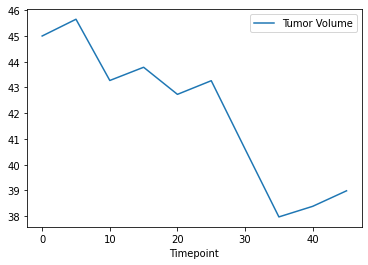

In [137]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mice = Capomulin_df['Mouse ID'].unique()
sample_mice = capomulin_mice[0]

sample_mice_df = Capomulin_df.loc[Capomulin_df['Mouse ID'] == sample_mice]
sample_mice_df
sample_mice_df.plot.line(x='Timepoint', y='Tumor Volume')


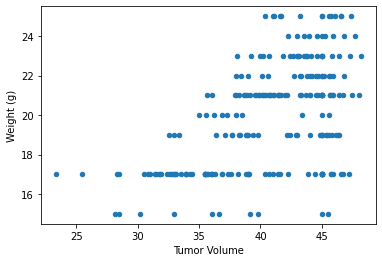

In [138]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_df.plot.scatter(x="Tumor Volume", y="Weight (g)")

## Correlation and Regression

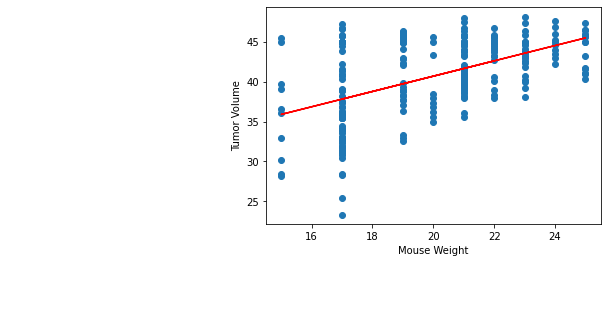

In [117]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = Capomulin_df['Weight (g)']
y_values = Capomulin_df['Tumor Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.show()